In [118]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

gg=pd.read_csv('Desktop\project ml\data\gg.csv')



In [119]:
categorical_columns = gg.select_dtypes(include=['object']).columns
gg = pd.get_dummies(gg, columns=categorical_columns)
non_numeric_columns = gg.select_dtypes(exclude=['float64', 'int64']).columns


In [120]:
non_numeric_columns = gg.select_dtypes(exclude=['float64', 'int64']).columns

gg = pd.get_dummies(gg, columns=non_numeric_columns)
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [121]:
imputer = SimpleImputer(strategy='mean')
gg = pd.DataFrame(imputer.fit_transform(gg), columns=gg.columns)

In [122]:
X = gg.drop(columns=['Price'])
y = gg['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [123]:
gg.to_csv('preprocessed_dataset.csv', index=False)

In [124]:
gg.isnull().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [126]:
X = gg.drop(columns=['Price'])
y = gg['Price']

In [127]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [129]:
# Create and train the linear regression model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [130]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [131]:
# Evaluate the model

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 35029743918.50725
R-squared: 0.7514192105724568


Text(0.5, 1.0, 'LinearRegressor')

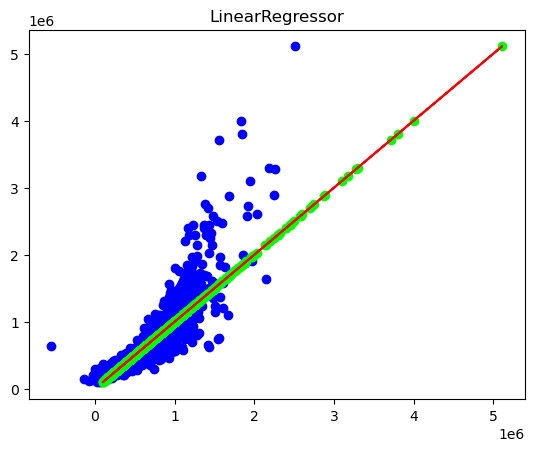

In [132]:
# Scatter plot for actual vs predicted values

plt.scatter(y_pred, y_test, color='blue', marker='o')
plt.scatter(y_test, y_test, color='lime', marker='o')
plt.plot(y_test, y_test, color="red", lw=1.5)
plt.title("LinearRegressor")


id


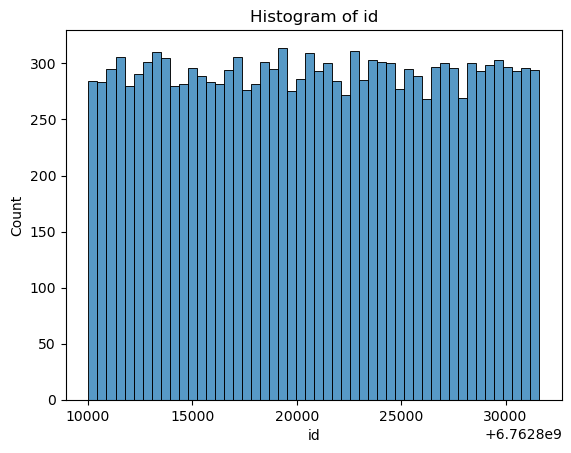

Date


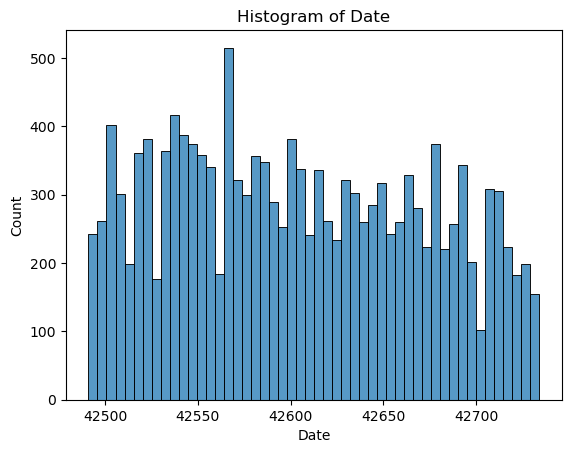

number of bedrooms


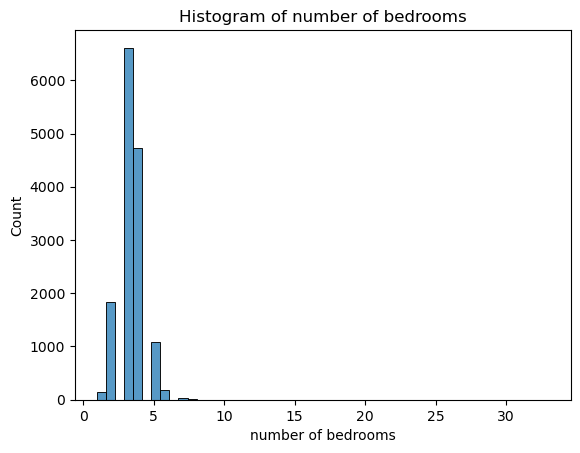

number of bathrooms


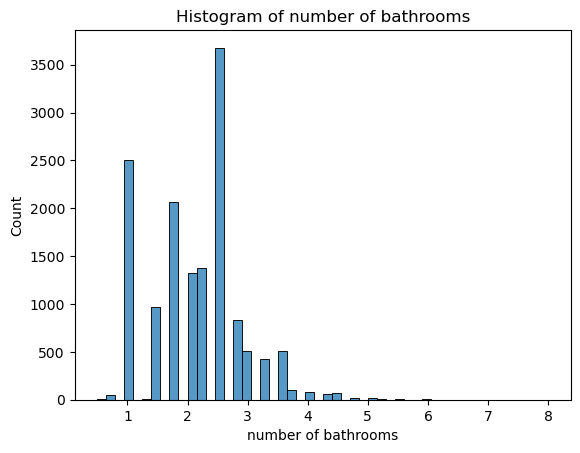

living area


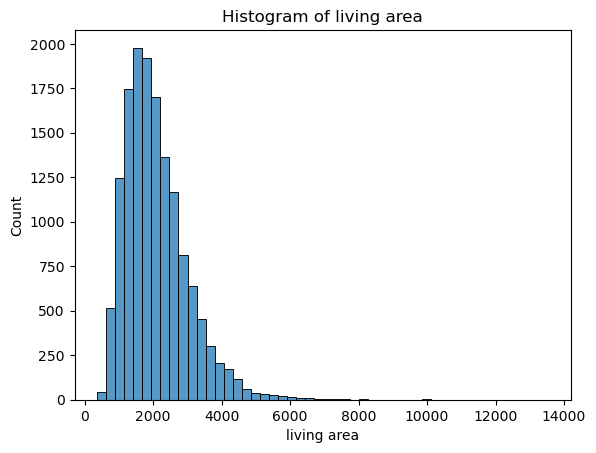

lot area


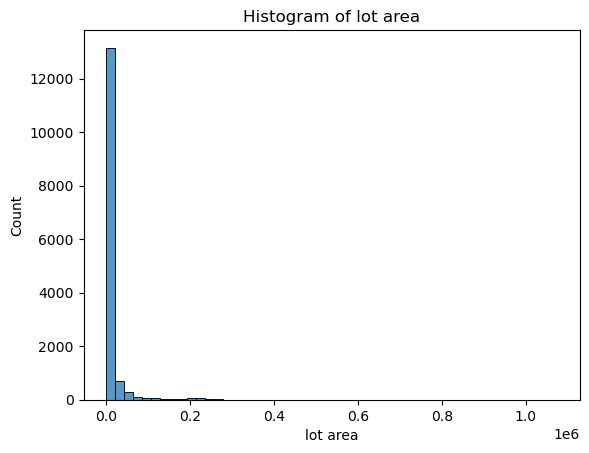

number of floors


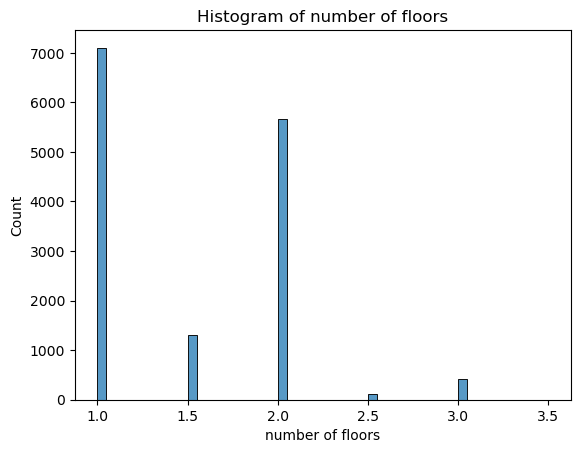

waterfront present


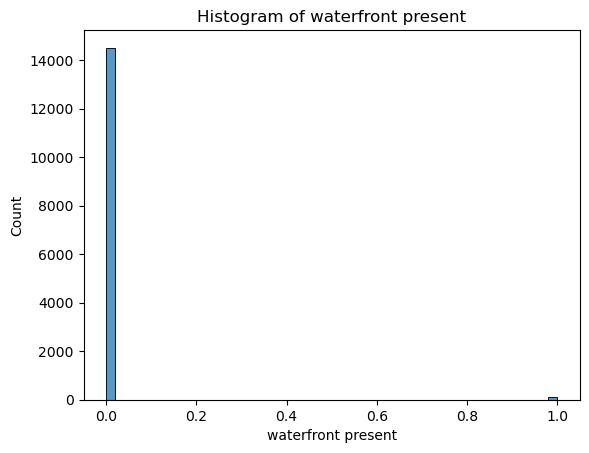

number of views


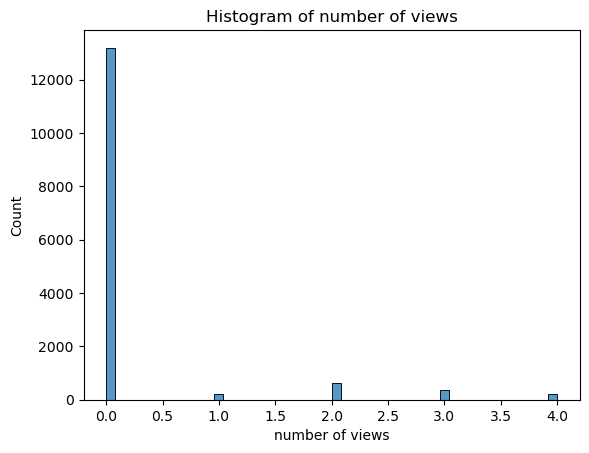

condition of the house


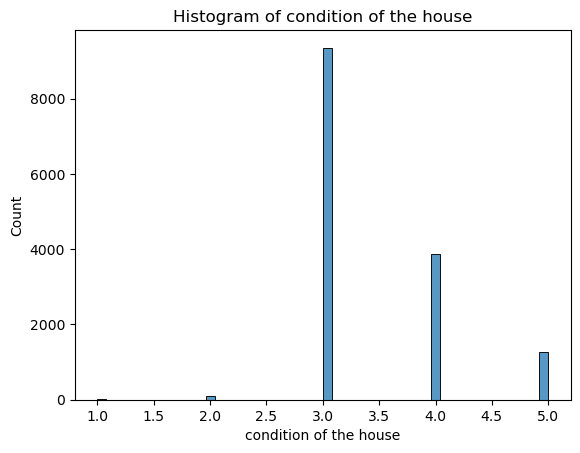

grade of the house


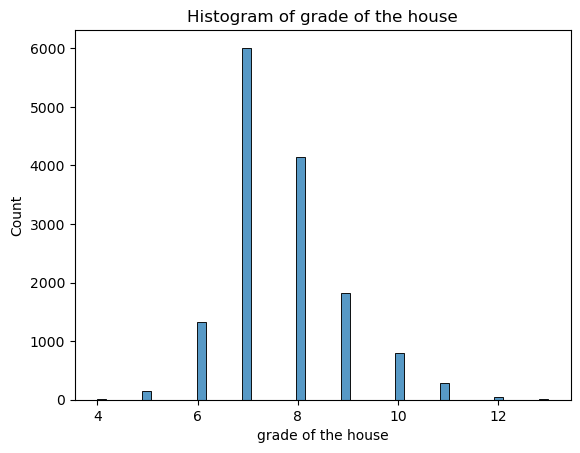

Area of the house(excluding basement)


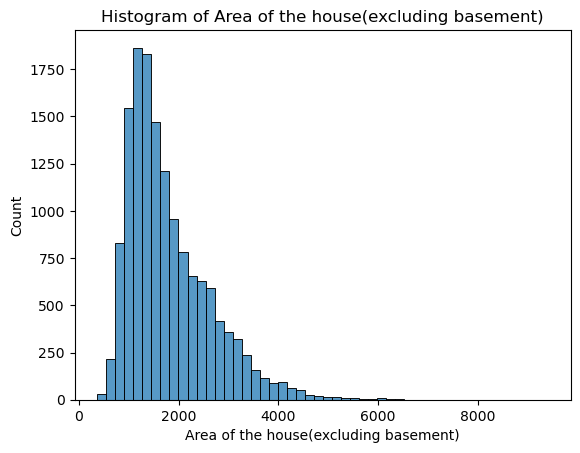

Area of the basement


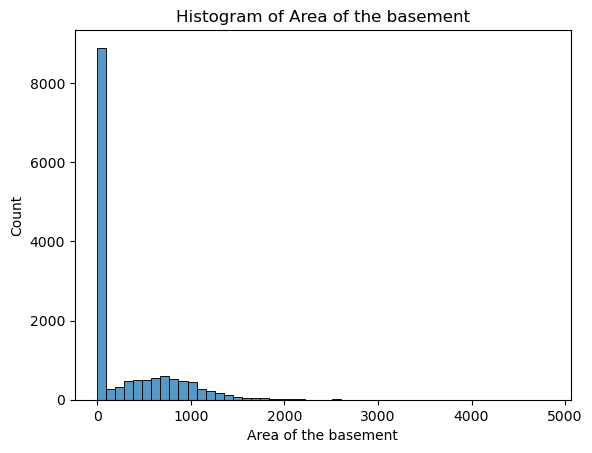

Built Year


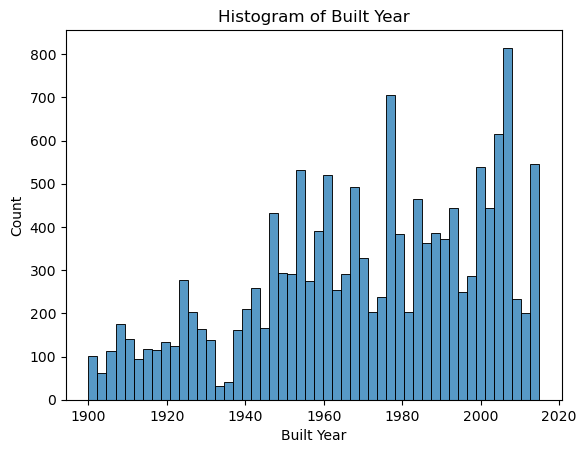

Renovation Year


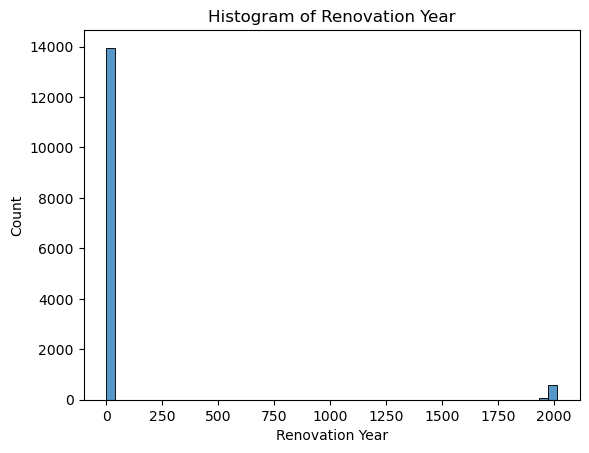

Postal Code


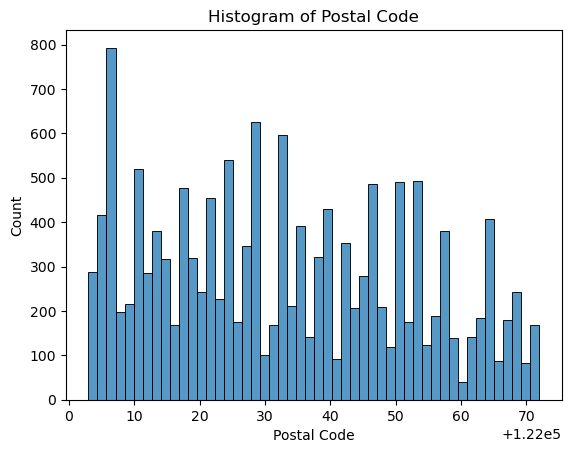

Lattitude


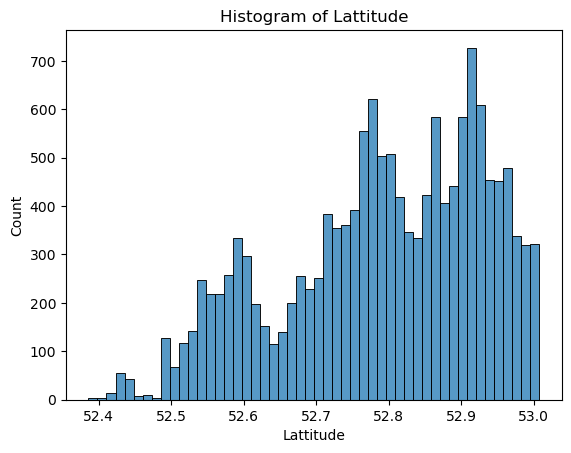

Longitude


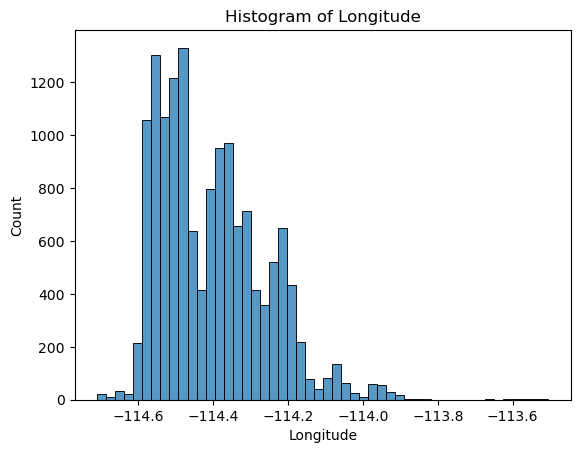

living_area_renov


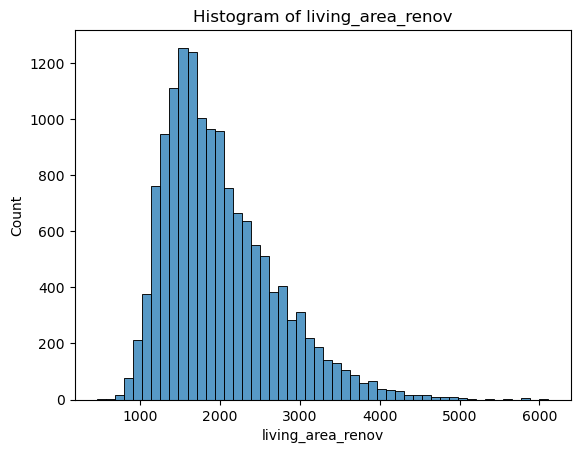

lot_area_renov


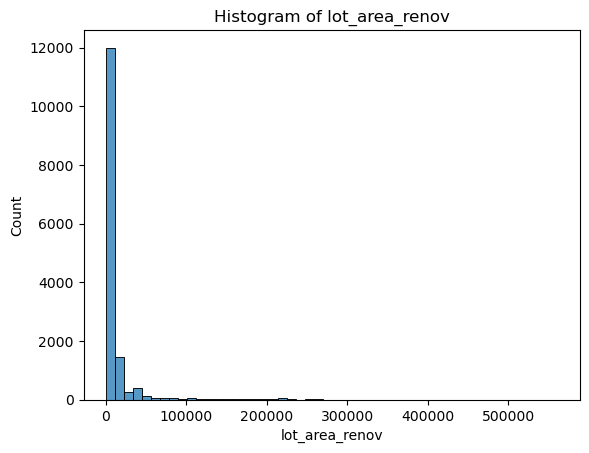

Number of schools nearby


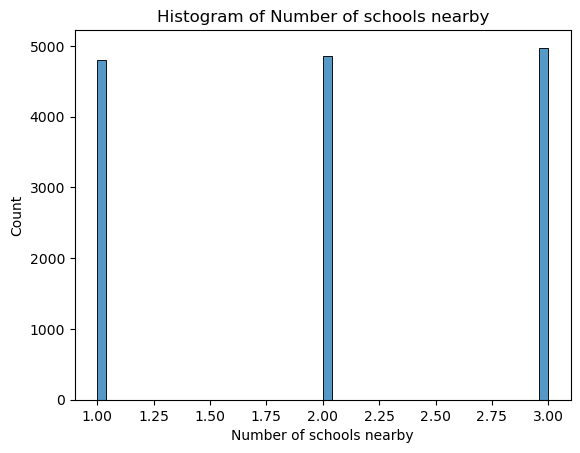

Distance from the airport


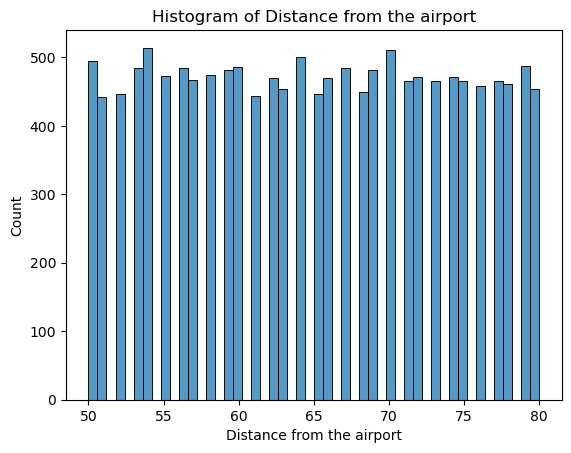

Price


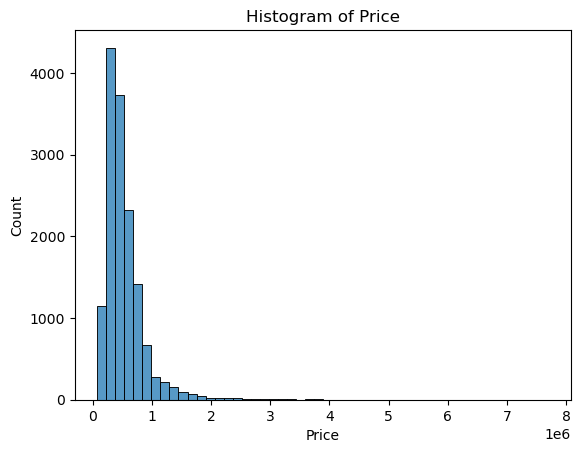

In [133]:
# Histograms for each feature

for col in gg.columns:
    print(col)
    sns.histplot(gg[col],bins=50)
    plt.title(f"Histogram of {col}")
    plt.show()

In [134]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [135]:
# Drop unnecessary columns
gg= gg.drop(['id', 'Date'], axis=1)


In [136]:
# Convert 'number of bedrooms' to int
gg['number of bedrooms'] = gg['number of bedrooms'].astype(int)

In [137]:
# Handling missing values if any
gg = gg.dropna()

In [138]:
# Extract features (X) and target variable (y)
X = gg.drop('Price', axis=1)
y = gg['Price']

In [139]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [140]:
# Create KNN regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)  

In [141]:
# Train the model
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [142]:
# Make predictions on the test set
y_pred = knn_model.predict(X_test_scaled)

In [143]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 25643308771.046566
R-squared Score: 0.818027960676207
